## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import random

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/study_results.csv")

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left")
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group = merge_table.groupby(['Drug Regimen'])

# Summary Statistics
mean_regimen = regimen_group['Tumor Volume (mm3)'].mean()
median_regimen = regimen_group['Tumor Volume (mm3)'].median()
variance_regimen = regimen_group['Tumor Volume (mm3)'].var()
std_regimen = regimen_group['Tumor Volume (mm3)'].std()
sem_regimen = regimen_group['Tumor Volume (mm3)'].sem()

some_stats = pd.DataFrame({"Regimen Mean": mean_regimen,
                            "Regimen Median": median_regimen,
                           "Regimen Variance": variance_regimen,
                           "Regimen Standard": std_regimen,
                           "Regimen Error": sem_regimen})
some_stats

,Regimen Mean,Regimen Median,Regimen Variance,Regimen Standard,Regimen Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

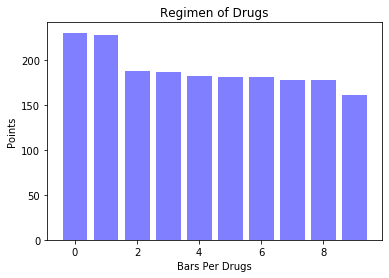

In [4]:
### Generate a bar plot showing number of data points for each treatment regimen using pandas

merged_drugs = merge_table["Drug Regimen"].value_counts()
merged_drugs 
x_axis = np.arange(len(merged_drugs))
plt.bar(x_axis, merged_drugs, color='b', alpha=0.5, align="center")

# Give the chart a title, x label, and y label
plt.title("Regimen of Drugs")
plt.xlabel("Bars Per Drugs")
plt.ylabel("Points")

# Print it to the screen
plt.show()

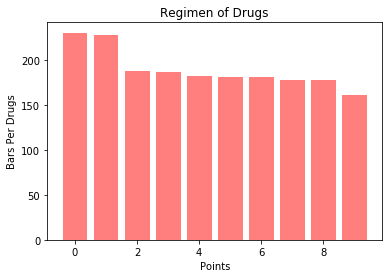

In [5]:
### Generate a bar plot showing number of data points for each treatment regimen using pyplot
# must pass x and y arguements

x_axis = np.arange(len(merged_drugs))
plt.bar(x_axis, merged_drugs, color='r', alpha=0.5, align="center")

# Create the ticks for our bar chart's x axis
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, DrugRegimen)

# Set the limits of the x axis
#plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
#plt.ylim(0, max(DrugRegimen)+0.4)

# Give the chart a title, x label, and y label
plt.title("Regimen of Drugs")
plt.xlabel("Points")
plt.ylabel("Bars Per Drugs")

# Print it to the screen
plt.show()

## Pie plots

(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

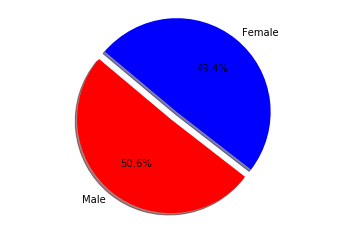

In [6]:
### Generate a pie plot showing the distribution of female versus male mice using pandas

regimen_group = merge_table.Sex.value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(regimen_group.values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

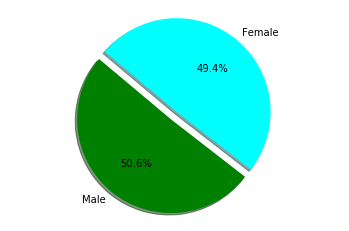

In [7]:
### Generate a pie plot showing the distribution of female versus male mice using pyplot

regimen_group = merge_table.Sex.value_counts()
regimen_group.head()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["green", "cyan"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(regimen_group.values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. ##(Below) Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Finding final tumar volume of each mouse
mice_grpd = merge_table.groupby(['Mouse ID']).max()

mice_grpd = mice_grpd.reset_index()

merged_data = mice_grpd[['Mouse ID', 'Timepoint']].merge(merge_table, on =['Mouse ID', 'Timepoint'], how ="left")
merged_data

Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
Capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ketapril = merged_data.loc[merged_data["Drug Regimen"] == "Ketapril"]["Tumor Volume (mm3)"]

promise_treat = pd.DataFrame({"Ceftamin": Ceftamin,
                            "Capomulin": Capomulin,
                           "Infubinol": Infubinol,
                           "Ketapril": Ketapril})
promise_treat



,Ceftamin,Capomulin,Infubinol,Ketapril
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
3,62.999356,NaN,NaN,NaN
8,NaN,NaN,NaN,49.783419
11,NaN,NaN,57.031862,NaN
...,...,...,...,...
235,NaN,NaN,NaN,62.909441
239,68.594745,NaN,NaN,NaN
240,NaN,31.896238,NaN,NaN
241,64.729837,NaN,NaN,NaN


In [9]:
### (Per above cell) Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine if there are any potential outliers in the average
quartiles = mice_grpd['Timepoint'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = mice_grpd.loc[(mice_grpd['Timepoint'] < lower_bound) | (mice_grpd['Timepoint'] > upper_bound)]
outlier_occupancy


The lower quartile of occupancy is: 20.0
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 25.0
The the median of occupancy is: 45.0 
Values below -17.5 could be outliers.
Values above 82.5 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


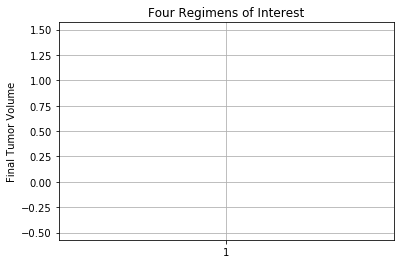

In [10]:
### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Four Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume')
plt.boxplot(outlier_occupancy) # pass in four medicines in list brackets, labels = [list bracket with four medicines])
plt.grid()
plt.show()

## Line and scatter plots

In [11]:
### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# find mice ID treated with medicine
# for example - capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
# timepoint x , tumor volume y

# Set x axis and variables
x_axis = np.arange(len(DrugRegimen))
sin = np.sin(x_axis)
cos = np.cos(x_axis)

# Draw a horizontal line with 0.25 transparency
plt.hlines(0, 0, 10, alpha=0.25)

# Each point on the sine chart is marked by a blue circle
sine_handle, = plt.plot(x_axis, sin, marker = "*", color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, cos, marker="x", color='red', label="Cosine")

# Adds a legend and sets its location to the lower right
plt.legend(loc="lower right")
plt.show()

NameError: name 'DrugRegimen' is not defined

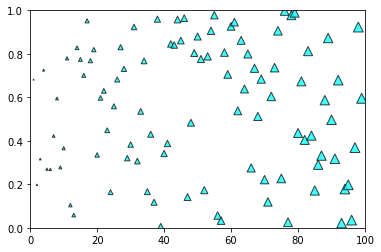

In [13]:
### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Capomulin data using .loc, give condition where medicine drug regimen = Capomulin
# example from previous cells
#Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
#Ceftamin
# then group by mouse ID for average tumor volume
#plt.scatter(#pass the mean, data, marker="^", facecolors="cyan", edgecolors="black", s=x_axis, alpha=0.75)
    # use weight as X and tumor volume as Y


# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="^", facecolors="cyan", edgecolors="black",
            s=x_axis, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 1)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit)

# Prints the scatter plot to the screen
plt.show()

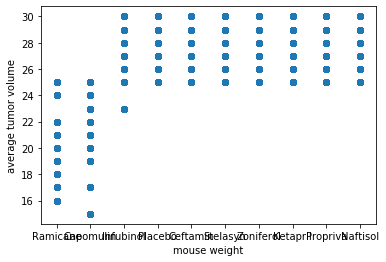

In [14]:
### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# weight_group = merge_table.groupby(['Weight (g)'])
plt.scatter(merge_table.iloc[:,1],merge_table.iloc[:,4])

plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')
plt.show()

In [ ]:
# linear regression take weight for x and tumor for y

x_values = housing_data['Weight (g)']
y_values = housing_data['Tumor Volume (mm3)']

model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]